<a href="https://colab.research.google.com/github/lauravalentinamm/Tareas_Mineria_Python/blob/main/Proyecto_Grupo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### RIESGO DE IMPAGO

Integrantes Grupo 3: Saray Daniella Garcia, Laura Valentina Montes Montes,Juan Felipe Vargas, Hasbleidy Andrea Sastoque

La presente base de datos es tomada de la plataforma kaggle (https://www.kaggle.com/gauravduttakiit/loan-defaulter) contiene 122 columnas y 307511 filas que corresponden a un cliente en especifico que toma un servicio financiero como lo es el prestamo o credito, el objetivo del presente trabajo es buscar y analizar el mejor metodo que nos permita minimizar el riesgo de perder dinero al otorgar préstamos a clientes por parte de las entidades.

Cabe resaltar que de las 122 columnas se van a trabajar 24 debido a que consideramos que son las mas importantes.

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np


In [44]:
urlDataset = 'https://raw.githubusercontent.com/Hassg99/Trabajo_Visualizacion/main/datos.csv'
datos = pd.read_csv(urlDataset,sep =";",
                   index_col = False,
                   error_bad_lines=False)

In [46]:
datos.columns.values

array(['ID', 'TARGET', 'CONTRACT_TYPE', 'SEX', 'OWN_REALTY', 'CHILDREN',
       'INCOME', 'CREDIT', 'INCOME_TYPE', 'EDUCATION_TYPE',
       'FAMILY_STATUS', 'HOUSING_TYPE', 'BIRTH', 'EMPLOYED', 'EMP_PHONE',
       'CONT_MOBILE', 'EMAIL', 'OCCUPATION_TYPE', 'WEEKDAY',
       'REG_REGION_NOT_LIVE_REGION', 'DEF_30_CNT', 'DEF_60_CNT',
       'DAYS_LAST_PHONE_CHANGE', 'BUREAU_3'], dtype=object)

**Variables a trabajar**

In [47]:
feature_cols = ['ID', 'TARGET', 'CONTRACT_TYPE', 'SEX','CHILDREN',
                'INCOME', 'CREDIT', 'INCOME_TYPE', 'EDUCATION_TYPE',
                'FAMILY_STATUS', 'HOUSING_TYPE','BIRTH','BUREAU_3']
datos = datos[feature_cols]
datos.head()

,ID,TARGET,CONTRACT_TYPE,SEX,CHILDREN,INCOME,CREDIT,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,BIRTH,BUREAU_3
0,100002,1,Cash loans,M,0,202500,406598,Workingg,Secondary / secondary special,Single / not married,House / apartment,26,0.0
1,100003,0,Cash loans,F,0,270000,1293503,State servant,Higher education,Married,House / apartment,46,0.0
2,100004,0,Revolving loans,M,0,67500,135000,Workingg,Secondary / secondary special,Single / not married,House / apartment,52,0.0
3,100006,0,Cash loans,F,0,135000,312683,Workingg,Secondary / secondary special,Civil marriage,House / apartment,52,NaN
4,100007,0,Cash loans,M,0,121500,513000,Workingg,Secondary / secondary special,Single / not married,House / apartment,55,0.0


In [48]:
#Estadisticas descriptivas de los datos numericos de la base de datos
datos.describe()

,ID,TARGET,CHILDREN,INCOME,CREDIT,BIRTH,BUREAU_3
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.736934e+05,5.990260e+05,44.048320,0.265474
std,102790.175348,0.272419,0.722121,1.124048e+06,4.024908e+05,12.126014,0.794056
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,20.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,34.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,43.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,54.000000,0.000000
max,456255.000000,1.000000,19.000000,3.368359e+08,4.050000e+06,70.000000,261.000000


**Datos Faltantes**

**1)** BUREAU_3: Con los datos de la variable Buró se asume la categoria de "9999" puesto que puden ser utiles al momento de identificar los clientes con un mayor riesgo de impago.

**2)** SEX: Se identifico que los datos faltantes de la variable sexo salen como 'XNA' y por tal motivo se asume la categoria 'DatoFaltante'.

In [49]:
#Datos vacios:
for col in datos.columns:
    num_missing = datos[col].isnull().sum() 

    if num_missing > 0:
      pct_missing = np.mean(datos[col].isnull())
      print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

BUREAU_3 - 13.5% - 41519


In [50]:
datos['BUREAU_3'] = datos['BUREAU_3'].fillna(datos['BUREAU_3'].mean())
datos['SEX'][datos['SEX']=='XNA'] = 'DatoFaltante'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [ ]:
datos[datos['SEX']=='DatoFaltante']

,ID,TARGET,CONTRACT_TYPE,SEX,CHILDREN,INCOME,CREDIT,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,BIRTH,BUREAU_3
35657,141289,0,Revolving loans,DatoFaltante,0,207000,382500,Workingg,Secondary / secondary special,Married,Municipal apartment,56,0.0
38566,144669,0,Revolving loans,DatoFaltante,2,157500,270000,Workingg,Secondary / secondary special,Married,House / apartment,38,0.0
83382,196708,0,Revolving loans,DatoFaltante,1,135000,405000,Workingg,Higher education,Married,House / apartment,29,0.0
189640,319880,0,Revolving loans,DatoFaltante,0,247500,540000,Commercial associate,Incomplete higher,Civil marriage,House / apartment,26,1.0


**Datos duplicados**

In [ ]:
datos[datos.duplicated()] #No hay datos duplicados

,ID,TARGET,CONTRACT_TYPE,SEX,CHILDREN,INCOME,CREDIT,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,BIRTH,BUREAU_3


**Normalizacion**

In [ ]:
datos['INCOME_N'] = (datos['INCOME'] - datos['INCOME'].mean())/ datos['INCOME'].std()
datos['CREDIT_N'] = (datos['CREDIT'] - datos['CREDIT'].mean())/ datos['CREDIT'].std()

datos.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,TARGET,CONTRACT_TYPE,SEX,CHILDREN,INCOME,CREDIT,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,BIRTH,BUREAU_3,INCOME_N,CREDIT_N
0,100002,1,Cash loans,M,0,202500,406598,Workingg,Secondary / secondary special,Single / not married,House / apartment,26,0.000000,0.025628,-0.478093
1,100003,0,Cash loans,F,0,270000,1293503,State servant,Higher education,Married,House / apartment,46,0.000000,0.085678,1.725448
2,100004,0,Revolving loans,M,0,67500,135000,Workingg,Secondary / secondary special,Single / not married,House / apartment,52,0.000000,-0.094474,-1.152886
3,100006,0,Cash loans,F,0,135000,312683,Workingg,Secondary / secondary special,Civil marriage,House / apartment,52,0.265474,-0.034423,-0.711428
4,100007,0,Cash loans,M,0,121500,513000,Workingg,Secondary / secondary special,Single / not married,House / apartment,55,0.000000,-0.046433,-0.213734


In [ ]:
datos['INCOME_N'].min()

-0.13170565882341195

**Discretizacion por frecuencias**

In [ ]:
datos['Ingreso_intervalo'] = pd.qcut(datos['INCOME'], q=5, precision=1)
datos['Ingreso_intervalo'] .value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(99000.0, 135000.0]        85756
(162000.0, 225000.0]       75510
(25649.9, 99000.0]         63667
(225000.0, 336835935.0]    47125
(135000.0, 162000.0]       35453
Name: Ingreso_intervalo, dtype: int64

In [ ]:
datos['Credito_intervalo'] = pd.qcut(datos['CREDIT'], q=5, precision=1)
datos['Credito_intervalo'] .value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(44999.9, 254700.0]      64925
(604152.0, 900000.0]     64024
(432000.0, 604152.0]     61552
(900000.0, 4050000.0]    58912
(254700.0, 432000.0]     58098
Name: Credito_intervalo, dtype: int64

**Correlacion**

In [ ]:
datos.columns.values

array(['ID', 'TARGET', 'CONTRACT_TYPE', 'SEX', 'CHILDREN', 'INCOME',
       'CREDIT', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_STATUS',
       'HOUSING_TYPE', 'BIRTH', 'BUREAU_3', 'INCOME_N', 'CREDIT_N',
       'Ingreso_intervalo', 'Credito_intervalo'], dtype=object)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#correlation_mat = datos.drop(columns = "ID").corr()
#sns.heatmap(correlation_mat, annot = True)
#plt.show()

**VALIDACION SIMPLE**

In [ ]:
datos.columns.values

array(['ID', 'TARGET', 'CONTRACT_TYPE', 'SEX', 'CHILDREN', 'INCOME',
       'CREDIT', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_STATUS',
       'HOUSING_TYPE', 'BIRTH', 'BUREAU_3', 'INCOME_N', 'CREDIT_N',
       'Ingreso_intervalo', 'Credito_intervalo'], dtype=object)

In [ ]:
feature_cols = ['CONTRACT_TYPE', 'SEX', 'CHILDREN', 
                'INCOME','CREDIT', 'INCOME_TYPE', 'EDUCATION_TYPE', 
                'FAMILY_STATUS', 'HOUSING_TYPE', 'BIRTH', 'BUREAU_3']

X = datos[feature_cols]
y = datos['TARGET']

# Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  

(246008, 11) (61503, 11) (246008,) (61503,)


### Entrega 1

**Graficas**

In [ ]:
df_default = datos[datos['TARGET']== 1]
df_default.head()

,ID,TARGET,CONTRACT_TYPE,SEX,CHILDREN,INCOME,CREDIT,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,BIRTH,BUREAU_3
0,100002,1,Cash loans,M,0,202500,406598,Workingg,Secondary / secondary special,Single / not married,House / apartment,26,0.0
26,100031,1,Cash loans,F,0,112500,979992,Workingg,Secondary / secondary special,Widow,House / apartment,52,2.0
40,100047,1,Cash loans,M,0,202500,1193580,Commercial associate,Secondary / secondary special,Married,House / apartment,48,0.0
42,100049,1,Cash loans,F,0,135000,288873,Workingg,Secondary / secondary special,Civil marriage,House / apartment,37,0.0
81,100096,1,Cash loans,F,0,81000,252000,Pensioner,Secondary / secondary special,Married,House / apartment,68,0.0


In [ ]:
df = datos[datos['SEX']!= 'DatoFaltante']

In [ ]:
datos["INCOME_group"] = pd.cut(datos["INCOME"], bins=[25000,100000,175000,250000,336835935])
datos.head()

,ID,TARGET,CONTRACT_TYPE,SEX,OWN_REALTY,CHILDREN,INCOME,CREDIT,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,BIRTH,EMPLOYED,EMP_PHONE,CONT_MOBILE,EMAIL,OCCUPATION_TYPE,WEEKDAY,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT,DEF_60_CNT,DAYS_LAST_PHONE_CHANGE,BUREAU_3,INCOME_group
0,100002,1,Cash loans,M,1,0,202500,406598,Workingg,Secondary / secondary special,Single / not married,House / apartment,26,2,1,1,0,Laborers,WEDNESDAY,0,2.0,2.0,-1134.0,0.0,"(175000, 250000]"
1,100003,0,Cash loans,F,0,0,270000,1293503,State servant,Higher education,Married,House / apartment,46,3,1,1,0,Core staff,MONDAY,0,0.0,0.0,-828.0,0.0,"(250000, 336835935]"
2,100004,0,Revolving loans,M,1,0,67500,135000,Workingg,Secondary / secondary special,Single / not married,House / apartment,52,1,1,1,0,Laborers,MONDAY,0,0.0,0.0,-815.0,0.0,"(25000, 100000]"
3,100006,0,Cash loans,F,1,0,135000,312683,Workingg,Secondary / secondary special,Civil marriage,House / apartment,52,8,1,1,0,Laborers,WEDNESDAY,0,0.0,0.0,-617.0,NaN,"(100000, 175000]"
4,100007,0,Cash loans,M,1,0,121500,513000,Workingg,Secondary / secondary special,Single / not married,House / apartment,55,8,1,1,0,Core staff,THURSDAY,0,0.0,0.0,-1106.0,0.0,"(100000, 175000]"


In [ ]:
datos["CREDIT_group"] = pd.cut(datos["CREDIT"], bins=[45000,275000,600000,875000,4050000])
datos.head()

,ID,TARGET,CONTRACT_TYPE,SEX,OWN_REALTY,CHILDREN,INCOME,CREDIT,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,BIRTH,EMPLOYED,EMP_PHONE,CONT_MOBILE,EMAIL,OCCUPATION_TYPE,WEEKDAY,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT,DEF_60_CNT,DAYS_LAST_PHONE_CHANGE,BUREAU_3,INCOME_group,CREDIT_group
0,100002,1,Cash loans,M,1,0,202500,406598,Workingg,Secondary / secondary special,Single / not married,House / apartment,26,2,1,1,0,Laborers,WEDNESDAY,0,2.0,2.0,-1134.0,0.0,"(175000, 250000]","(275000, 600000]"
1,100003,0,Cash loans,F,0,0,270000,1293503,State servant,Higher education,Married,House / apartment,46,3,1,1,0,Core staff,MONDAY,0,0.0,0.0,-828.0,0.0,"(250000, 336835935]","(875000, 4050000]"
2,100004,0,Revolving loans,M,1,0,67500,135000,Workingg,Secondary / secondary special,Single / not married,House / apartment,52,1,1,1,0,Laborers,MONDAY,0,0.0,0.0,-815.0,0.0,"(25000, 100000]","(45000, 275000]"
3,100006,0,Cash loans,F,1,0,135000,312683,Workingg,Secondary / secondary special,Civil marriage,House / apartment,52,8,1,1,0,Laborers,WEDNESDAY,0,0.0,0.0,-617.0,NaN,"(100000, 175000]","(275000, 600000]"
4,100007,0,Cash loans,M,1,0,121500,513000,Workingg,Secondary / secondary special,Single / not married,House / apartment,55,8,1,1,0,Core staff,THURSDAY,0,0.0,0.0,-1106.0,0.0,"(100000, 175000]","(275000, 600000]"


In [ ]:
datos["CREDIT_group"] = pd.cut(datos["CREDIT"], bins=[45000,275000,600000,875000,4050000])

In [ ]:
datos["BIRTH_group"] = pd.cut(datos["BIRTH"], bins=[20,30,40,50,70])

In [ ]:
datos["INCOME_group"] = pd.cut(datos["INCOME"], bins=[25000,100000,175000,250000,336835935])

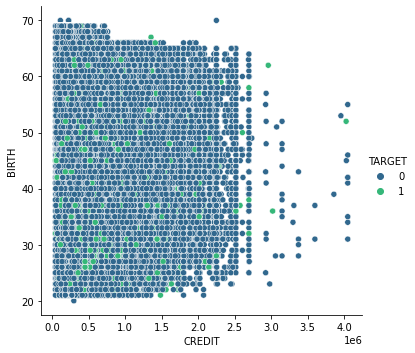

In [ ]:
sns.relplot(data=datos, x="CREDIT", y="BIRTH", hue = 'TARGET', palette='viridis')

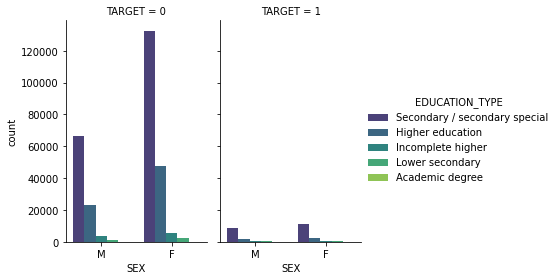

In [ ]:
df = datos[datos['SEX']!= 'DatoFaltante']
g = sns.catplot(x="SEX", hue="EDUCATION_TYPE", col="TARGET",
               data=df, kind="count",
               height=4, aspect=.7, palette="viridis");


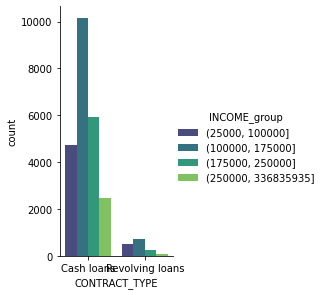

In [ ]:
g = sns.catplot(x="CONTRACT_TYPE", hue="INCOME_group",
               data=df_default, kind="count",
               height=4, aspect=.7, palette="viridis");

<Figure size 14400x14400 with 0 Axes>

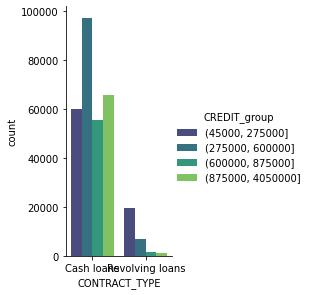

In [ ]:
plt.figure(figsize=(200,200))
sns.catplot(x="CONTRACT_TYPE", hue="CREDIT_group",
               data=datos, kind="count",
               height=4, aspect=.7, palette="viridis")


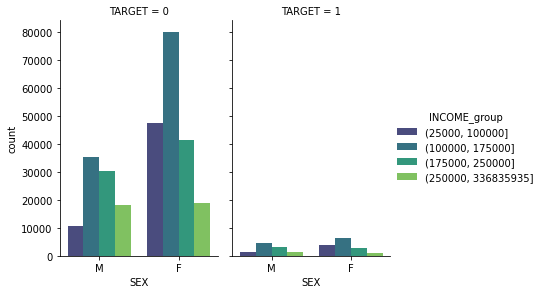

In [ ]:
g = sns.catplot(x="SEX", hue="INCOME_group", col="TARGET",
                data=df, kind="count",
                height=4, aspect=.7, palette="viridis");

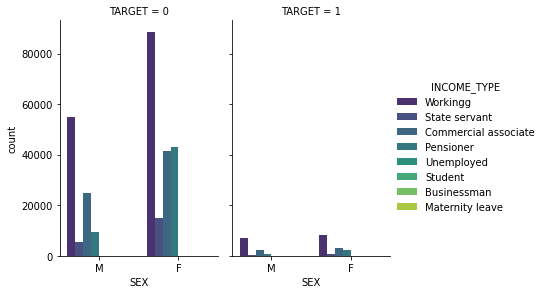

In [ ]:
g = sns.catplot(x="SEX", hue="INCOME_TYPE", col="TARGET",
                data=df, kind="count",
                height=4, aspect=.7, palette="viridis");

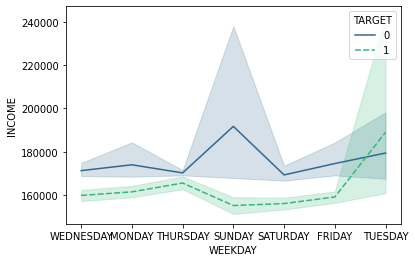

In [ ]:
#sns.lineplot(data=df_default, x='WEEKDAY', y = '' palette="viridis")
#sns.lineplot(data=datos, x="WEEKDAY", y="CREDIT", hue="TARGET", style = 'TARGET', palette="viridis")
sns.lineplot(data=datos, x="WEEKDAY", y="INCOME", hue="TARGET", style = 'TARGET', palette="viridis")

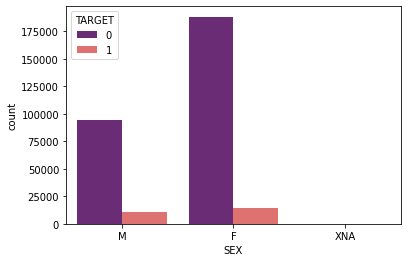

In [ ]:
sns.countplot(data=datos, x='SEX',hue='TARGET',palette="magma")

In [ ]:
tab3 = df[['SEX', "TARGET"]].value_counts().rename_axis(['label', 'Target']).reset_index(name='counts')
tab3


,label,Target,counts
0,F,0,188278
1,M,0,94404
2,F,1,14170
3,M,1,10655


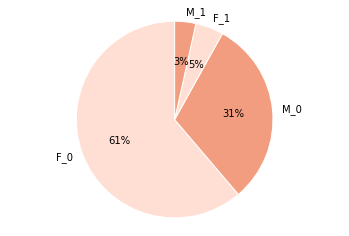

In [ ]:
explode = (0, 0.1, 0, 0.1, 0)
colors = [ '#ffded3', '#f29d7f']
mylabels = ['F_0',"M_0",'F_1', "M_1"]
fig1, ax1 = plt.subplots()
ax1.pie(tab3['counts'],
        labels=mylabels,
        #explode = explode,
        autopct='%1.0f%%',
        shadow=False, 
        startangle=90,
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
        colors=colors
     )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
tab4 = datos['CHILDREN'].value_counts().rename_axis('# Hijos').reset_index(name='# Personas')
tab4

,# Hijos,# Personas
0,0,215371
1,1,61119
2,2,26749
3,3,3717
4,4,429
5,5,84
6,6,21
7,7,7
8,14,3
9,19,2


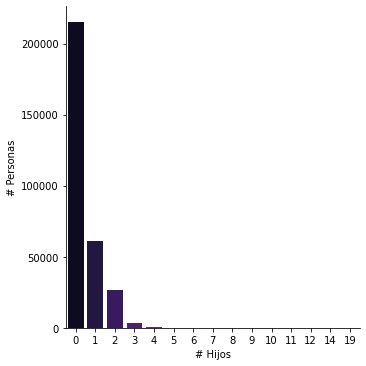

In [ ]:
sns.catplot(data = tab4,
            kind = "bar",
            estimator = sum,
            x = "# Hijos",
            y = "# Personas",
            palette = 'magma',
            ci = None)


In [ ]:
tab4 = datos[['CHILDREN', 'TARGET', 'INCOME']].value_counts().rename_axis(['# Hijos', 'Target', 'Ingreso']).reset_index(name='# Personas')
tab4

,# Hijos,Target,Ingreso,# Personas
0,0,0,135000,22723
1,0,0,112500,20072
2,0,0,157500,16916
3,0,0,180000,15412
4,0,0,90000,14411
...,...,...,...,...
4122,2,0,77985,1
4123,2,0,79079,1
4124,0,0,555327,1
4125,0,0,549000,1


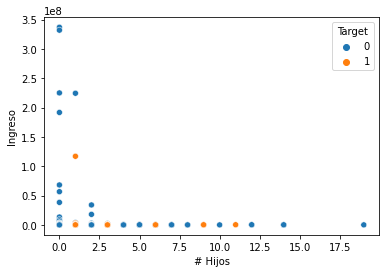

In [ ]:
sns.scatterplot(data=tab4,  x="# Hijos", y="Ingreso", hue = "Target")

In [ ]:
tab5 = datos[['SEX','EDUCATION_TYPE']].value_counts().rename_axis(['Sexo','Nivel Educativo']).reset_index(name='# Personas')
tab5

,Sexo,Nivel Educativo,# Personas
0,F,Secondary / secondary special,143465
1,M,Secondary / secondary special,74924
2,F,Higher education,50289
3,M,Higher education,24573
4,F,Incomplete higher,6283
5,M,Incomplete higher,3993
6,F,Lower secondary,2311
7,M,Lower secondary,1505
8,F,Academic degree,100
9,M,Academic degree,64


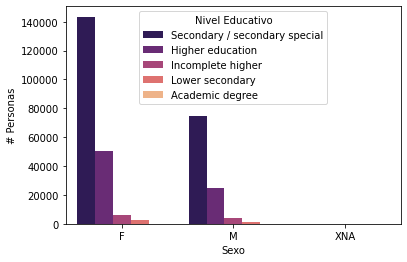

In [ ]:
sns.barplot(data = tab5,
            estimator = sum,
            x = "Sexo", 
            y = "# Personas",
            hue = "Nivel Educativo",
            palette = 'magma',
            ci = None,
            )

In [ ]:
tab5 = datos['FAMILY_STATUS'].value_counts().rename_axis('Estado Civil').reset_index(name='# Personas')
tab5

,Estado Civil,# Personas
0,Married,196432
1,Single / not married,45444
2,Civil marriage,29775
3,Separated,19770
4,Widow,16088
5,Unknown,2


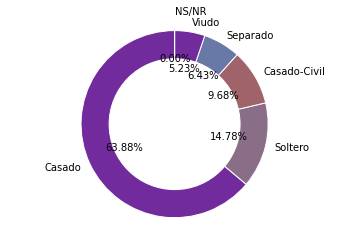

In [ ]:
explode = (0, 0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = [ '#712b9d', '#8a6e88', '#a1636a', '#6879a8']
mylabels = ['Casado', "Soltero", "Casado-Civil", "Separado", "Viudo", "NS/NR"]
fig1, ax1 = plt.subplots()
ax1.pie(tab5['# Personas'],
        labels=mylabels,
        explode = explode,
        autopct='%1.2f%%',
        shadow=False, 
        startangle=90,
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
p=plt.gcf()
my_circle=plt.Circle( (0,0), 0.7, color='white')
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
tab6 = datos['INCOME_TYPE'].value_counts().rename_axis('Fuente de Ingreso').reset_index(name='# Personas')
tab6


,Fuente de Ingreso,# Personas
0,Workingg,158774
1,Commercial associate,71617
2,Pensioner,55362
3,State servant,21703
4,Unemployed,22
5,Student,18
6,Businessman,10
7,Maternity leave,5


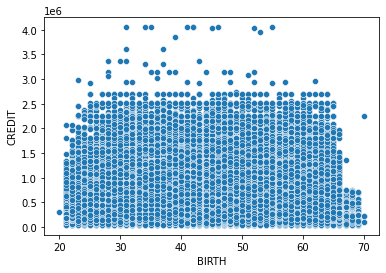

In [ ]:
sns.scatterplot(data=datos,  y="CREDIT", x="BIRTH", palette = "magma")

In [ ]:
df = datos[datos['INCOME'] < 250000]
df2 = datos[datos['TARGET'] == 1]
df2.head()

,ID,TARGET,CONTRACT_TYPE,SEX,OWN_REALTY,CHILDREN,INCOME,CREDIT,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,BIRTH,EMPLOYED,EMP_PHONE,CONT_MOBILE,EMAIL,OCCUPATION_TYPE,WEEKDAY,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT,DEF_60_CNT,DAYS_LAST_PHONE_CHANGE,BUREAU_3,INCOME_group,CREDIT_group,BIRTH_group
0,100002,1,Cash loans,M,1,0,202500,406598,Workingg,Secondary / secondary special,Single / not married,House / apartment,26,2,1,1,0,Laborers,WEDNESDAY,0,2.0,2.0,-1134.0,0.0,"(175000, 250000]","(275000, 600000]","(20, 30]"
26,100031,1,Cash loans,F,1,0,112500,979992,Workingg,Secondary / secondary special,Widow,House / apartment,52,7,1,1,0,Cooking staff,MONDAY,0,1.0,0.0,-161.0,2.0,"(100000, 175000]","(875000, 4050000]","(50, 70]"
40,100047,1,Cash loans,M,1,0,202500,1193580,Commercial associate,Secondary / secondary special,Married,House / apartment,48,4,1,1,0,Laborers,TUESDAY,0,0.0,0.0,-1075.0,0.0,"(175000, 250000]","(875000, 4050000]","(40, 50]"
42,100049,1,Cash loans,F,0,0,135000,288873,Workingg,Secondary / secondary special,Civil marriage,House / apartment,37,10,1,1,0,Sales staff,THURSDAY,0,0.0,0.0,-1480.0,0.0,"(100000, 175000]","(275000, 600000]","(30, 40]"
81,100096,1,Cash loans,F,1,0,81000,252000,Pensioner,Secondary / secondary special,Married,House / apartment,68,50,0,1,0,NaN,THURSDAY,0,1.0,1.0,0.0,0.0,"(25000, 100000]","(45000, 275000]","(50, 70]"


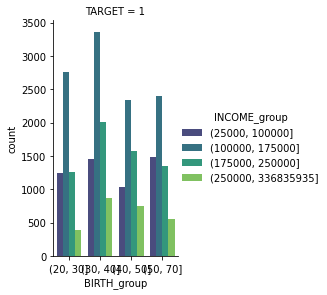

In [ ]:
g = sns.catplot(x="BIRTH_group", hue="INCOME_group", col="TARGET",
                data=df2, kind="count",
                height=4, aspect=.7, palette="viridis");

### Entrega 2

**MODELO: ÁRBOL**

In [ ]:
datos.columns.values

array(['ID', 'TARGET', 'CONTRACT_TYPE', 'SEX', 'CHILDREN', 'INCOME',
       'CREDIT', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_STATUS',
       'HOUSING_TYPE', 'BIRTH', 'BUREAU_3', 'INCOME_N', 'CREDIT_N',
       'Ingreso_intervalo', 'Credito_intervalo'], dtype=object)

In [ ]:
import pandas as pd
from sklearn import metrics
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

In [ ]:
datos['SEX_C'] = datos.SEX.map({'F':0, 'M':1,'DatoFaltante':0})

datos['CONTRACT_TYPE_C'] = datos.CONTRACT_TYPE.map({'Cash loans':0, 'Revolving loans':1})

datos['INCOME_TYPE_C'] = datos.INCOME_TYPE.map({'Workingg':0, 'Commercial associate':1,'Pensioner':2, 'State servant':3, 
                                        'Unemployed':4, 'Student':5,'Businessman':6, 'Maternity leave':7})

datos['EDUCATION_TYPE_C'] = datos.EDUCATION_TYPE.map({'Secondary / secondary special':0, 'Higher education':1,
                                           'Incomplete higher':2, 'Lower secondary':3,
                                           'Academic degree':4})

datos['FAMILY_STATUS_C'] = datos.FAMILY_STATUS.map({'Civil marriage':0, 'Married':1, 
                                           'Separated':2, 'Single / not married':3, 
                                           'Unknown':3, 'Widow':4})

datos['HOUSING_TYPE_C'] = datos.HOUSING_TYPE.map({'Co-op apartment':0, 'House / apartment':1, 
                                           'Municipal apartment':0, 'Office apartment':0, 
                                           'Rented apartment':0, 'With parents':2})

datos['Ingreso_intervalo_C'] = datos.Ingreso_intervalo.map({'(25649.9, 99000.0]':0, '(99000.0, 135000.0]':1, 
                                           '(135000.0, 162000.0]':2, '(162000.0, 225000.0]':3, 
                                           '(225000.0, 336835935.0]':4})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [ ]:
datos['CHILDREN_C'] = datos.CHILDREN.map({0:0, 1:1, 2:1, 3:1, 4:1,
                                                   5:0, 6:1, 7:1, 8:1, 9:1,
                                                   10:0, 11:1, 12:1, 14:1, 19:1})

In [ ]:
datos['CHILDREN_C'].value_counts().sort_index()

0    215457
1     92054
Name: CHILDREN_C, dtype: int64

In [ ]:
datos['Rango_Ingreso'] = str(datos['Ingreso_intervalo'])
datos['Rango_Ingreso'].head()

0    0            (162000.0, 225000.0]\n1         (...
1    0            (162000.0, 225000.0]\n1         (...
2    0            (162000.0, 225000.0]\n1         (...
3    0            (162000.0, 225000.0]\n1         (...
4    0            (162000.0, 225000.0]\n1         (...
Name: Rango_Ingreso, dtype: object

In [ ]:
#Datos vacios:
for col in datos.columns:
    num_missing = datos[col].isnull().sum() 

    if num_missing > 0:
      pct_missing = np.mean(datos[col].isnull())
      print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

Ingreso_intervalo_C - 100.0% - 307511


In [ ]:
#VARIABLES MAS IMPORTANTES PARA HACER EL ARBOL

feature_cols = ['CONTRACT_TYPE_C', 'SEX_C', 'CHILDREN_C', 'INCOME','CREDIT', 
                 'INCOME_TYPE_C', 'EDUCATION_TYPE_C', 'FAMILY_STATUS_C', 
                 'BIRTH', 'BUREAU_3','HOUSING_TYPE_C']

Y = datos.TARGET
X = datos[feature_cols]

# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
treereg.fit(X, Y)

# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,CONTRACT_TYPE_C,0.029312
1,SEX_C,0.121364
2,CHILDREN_C,0.000000
3,INCOME,0.000000
4,CREDIT,0.175876
5,INCOME_TYPE_C,0.000000
6,EDUCATION_TYPE_C,0.329682
7,FAMILY_STATUS_C,0.000000
8,BIRTH,0.343766
9,BUREAU_3,0.000000


In [ ]:
feature_cols = ['CONTRACT_TYPE_C', 'SEX_C', 'CHILDREN_C', 'INCOME','CREDIT', 
                 'INCOME_TYPE_C', 'EDUCATION_TYPE_C', 'FAMILY_STATUS_C', 
                 'BIRTH', 'BUREAU_3','HOUSING_TYPE_C']

Y = datos.TARGET
X = datos[feature_cols]

treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X, Y)
export_graphviz(treeclf, out_file='tree_titanic.dot', feature_names=feature_cols)

In [ ]:
feature_cols = ['TARGET','CONTRACT_TYPE_C', 'SEX_C', 'CHILDREN_C', 'INCOME','CREDIT', 
                 'INCOME_TYPE_C', 'EDUCATION_TYPE_C', 'FAMILY_STATUS_C', 
                 'BIRTH', 'BUREAU_3','HOUSING_TYPE_C']

nomas = datos[feature_cols]

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

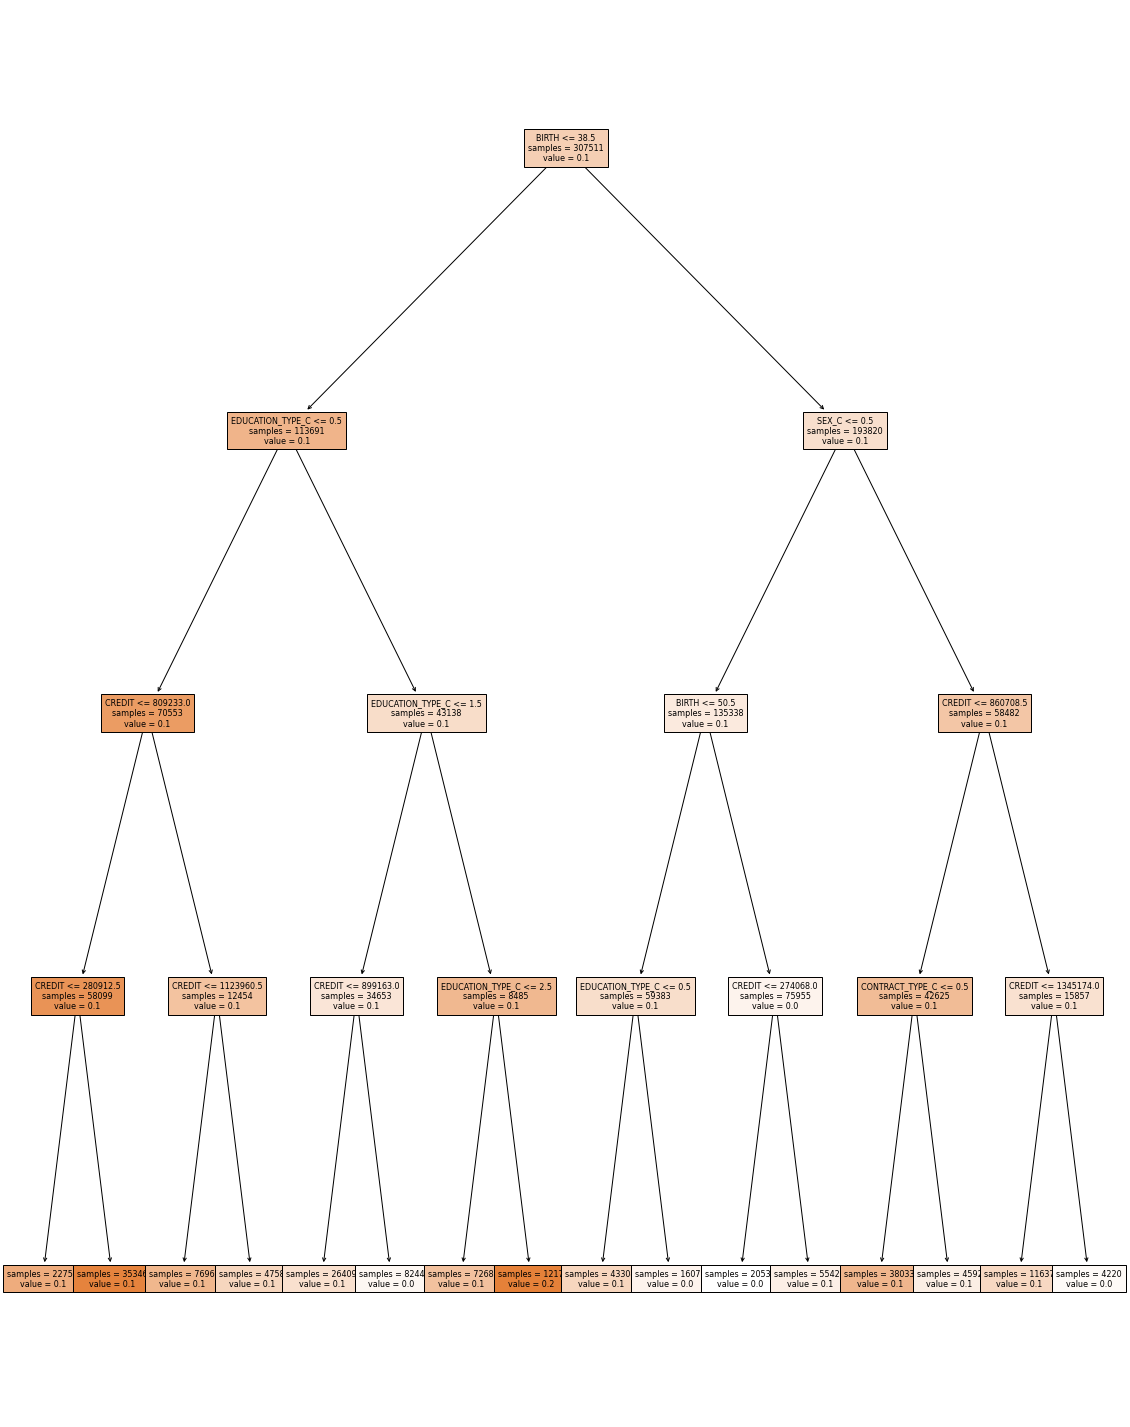

In [ ]:
#No tiene en cuenta TARGET

plt.figure(figsize=(20,26))
plot = plot_tree(
            decision_tree = treereg,
            feature_names = nomas.drop(columns = "TARGET").columns,
            class_names   = 'TARGET',
            filled        = True,
            impurity      = False,
            fontsize      = 8,
            precision     = 1,
       )

In [ ]:
#Calcular Precisión
# Definir conjuntos de variables
X = datos[feature_cols]
y = datos['TARGET']

# Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3000)

# Estimar el modelo
from sklearn.linear_model import LogisticRegression
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X, Y)

# Predecir la variable respuesta
y_pred = treeclf.predict(X_test)

In [ ]:
from sklearn import metrics
print('Precisión:', metrics.precision_score(y_test, y_pred))

Precisión: 1.0


In [ ]:
#Calcular AUC
from sklearn.metrics import roc_auc_score
print('ROC AUC score:', metrics.roc_auc_score(y_test, y_pred, average=None))

ROC AUC score: 1.0


In [ ]:
#Estimar los modelos con el conjunto de entrenamiento
from sklearn.model_selection import train_test_split
print('MSE Árbol de decisión:', metrics.mean_squared_error(y_test, y_pred))

MSE Árbol de decisión: 0.0


In [ ]:
#Exactitud
from sklearn import metrics
print('Exactitud:', metrics.accuracy_score(y_test, y_pred))

Exactitud: 1.0


MODELO LOGIT

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['CONTRACT_TYPE_C', 'SEX_C', 'CHILDREN_C', 'INCOME','CREDIT', 
                 'INCOME_TYPE_C', 'EDUCATION_TYPE_C', 'FAMILY_STATUS_C', 
                 'BIRTH', 'BUREAU_3','HOUSING_TYPE_C']
X = datos[feature_cols]
y = datos.TARGET
logreg.fit(X, y)
datos['TARGET_pred_class'] = logreg.predict(X)

In [ ]:
datos.TARGET_pred_class.value_counts().sort_index()

0    307511
Name: TARGET_pred_class, dtype: int64

In [ ]:
datos['Target_pred_prob'] = logreg.predict_proba(X)[:, 1]
datos.head()

,ID,TARGET,CONTRACT_TYPE,SEX,CHILDREN,INCOME,CREDIT,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,BIRTH,BUREAU_3,INCOME_N,CREDIT_N,Ingreso_intervalo,Credito_intervalo,SEX_C,CONTRACT_TYPE_C,INCOME_TYPE_C,EDUCATION_TYPE_C,FAMILY_STATUS_C,HOUSING_TYPE_C,Ingreso_intervalo_C,CHILDREN_C,Rango_Ingreso,TARGET_pred_class,Target_pred_prob
0,100002,1,Cash loans,M,0,202500,406598,Workingg,Secondary / secondary special,Single / not married,House / apartment,26,0.000000,0.025628,-0.478093,"(162000.0, 225000.0]","(254700.0, 432000.0]",1,0,0,0,3,1,NaN,0,"0 (162000.0, 225000.0]\n1 (...",0,0.070868
1,100003,0,Cash loans,F,0,270000,1293503,State servant,Higher education,Married,House / apartment,46,0.000000,0.085678,1.725448,"(225000.0, 336835935.0]","(900000.0, 4050000.0]",0,0,3,1,1,1,NaN,0,"0 (162000.0, 225000.0]\n1 (...",0,0.012035
2,100004,0,Revolving loans,M,0,67500,135000,Workingg,Secondary / secondary special,Single / not married,House / apartment,52,0.000000,-0.094474,-1.152886,"(25649.9, 99000.0]","(44999.9, 254700.0]",1,1,0,0,3,1,NaN,0,"0 (162000.0, 225000.0]\n1 (...",0,0.297664
3,100006,0,Cash loans,F,0,135000,312683,Workingg,Secondary / secondary special,Civil marriage,House / apartment,52,0.265474,-0.034423,-0.711428,"(99000.0, 135000.0]","(254700.0, 432000.0]",0,0,0,0,0,1,NaN,0,"0 (162000.0, 225000.0]\n1 (...",0,0.145449
4,100007,0,Cash loans,M,0,121500,513000,Workingg,Secondary / secondary special,Single / not married,House / apartment,55,0.000000,-0.046433,-0.213734,"(99000.0, 135000.0]","(432000.0, 604152.0]",1,0,0,0,3,1,NaN,0,"0 (162000.0, 225000.0]\n1 (...",0,0.130695


In [ ]:
logreg.coef_

array([[-1.62836840e-07,  4.62358317e-08, -1.04160854e-07,
        -1.00955069e-05, -1.29928821e-06, -7.85555985e-07,
        -1.87812406e-07, -9.32666460e-07, -3.05954018e-05,
        -1.33915520e-07, -5.51569453e-07]])

In [ ]:
logreg.intercept_

array([-5.6722136e-07])

In [ ]:
feature_cols, logreg.coef_[0]

(['CONTRACT_TYPE_C',
  'SEX_C',
  'CHILDREN_C',
  'INCOME',
  'CREDIT',
  'INCOME_TYPE_C',
  'EDUCATION_TYPE_C',
  'FAMILY_STATUS_C',
  'BIRTH',
  'BUREAU_3',
  'HOUSING_TYPE_C'],
 array([-1.62836840e-07,  4.62358317e-08, -1.04160854e-07, -1.00955069e-05,
        -1.29928821e-06, -7.85555985e-07, -1.87812406e-07, -9.32666460e-07,
        -3.05954018e-05, -1.33915520e-07, -5.51569453e-07]))

In [ ]:
#Calcular Precisión
# Definir conjuntos de variables
X = datos[feature_cols]
y = datos['TARGET']

# Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3000)

# Estimar el modelo
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predecir la variable respuesta
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print('Precisión:', metrics.precision_score(y_test, y_pred))

Precisión: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Calcular AUC
from sklearn.metrics import roc_auc_score
print('ROC AUC score:', metrics.roc_auc_score(y_test, y_pred, average=None))

ROC AUC score: 0.5


In [ ]:
#Estimar los modelos con el conjunto de entrenamiento
from sklearn.model_selection import train_test_split
print('MSE regresión logistica:', metrics.mean_squared_error(y_test, y_pred))

MSE regresión logistica: 0.07936198234232476


In [ ]:
#Exactitud
from sklearn import metrics
print('Exactitud:', metrics.accuracy_score(y_test, y_pred))

Exactitud: 0.9206380176576753
